<ipython-input-29-406d17ee3860>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


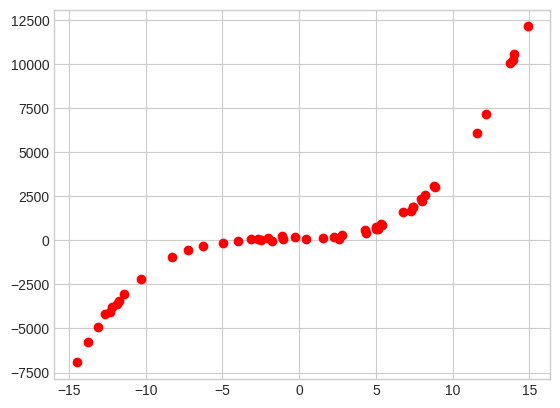

In [29]:
# Simulated data is given as follows in Python:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
noise_scale = 100
number_of_samples = 50
x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
y = 2 * x + 11 * x**2 + 3 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

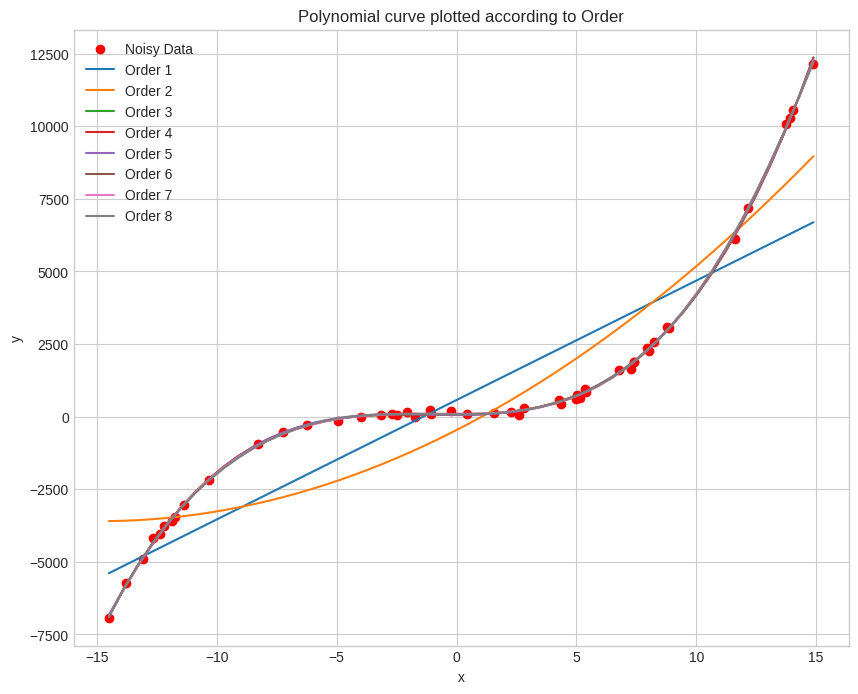

In [30]:
orders = [1, 2, 3, 4, 5, 6, 7, 8]

plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='r', label='Noisy Data', marker='o')

# Iterate through different polynomial orders
for order in orders:
    # Fit the polynomial curve
    coefficients = np.polyfit(x.flatten(), y.flatten(), order)
    poly = np.poly1d(coefficients)

    #Generate x values for the polynomial curve
    x_plot = np.linspace(min(x), max(x), 50)

    #Calculate y values for the polynomial curve using the fitted polynomial
    y_plot = poly(x_plot)

    # Plot the polynomial curve
    plt.plot(x_plot, y_plot, label=f'Order {order}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial curve plotted according to Order')
plt.grid(True)

plt.show()


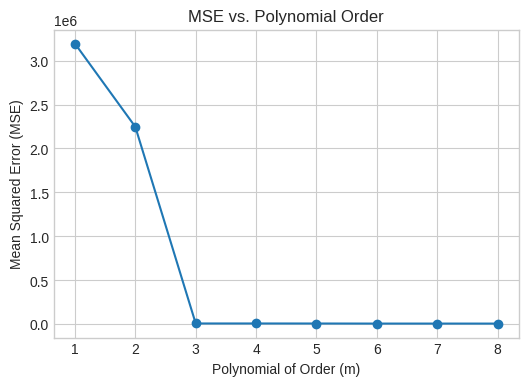

In [31]:
MSE = []

# Fit polynomials and calculate MSE for each order
for order in orders:
    coefficients = np.polyfit(x.flatten(), y.flatten(), order)
    poly = np.poly1d(coefficients)

    # Calculate fitted values
    y_predicted = poly(x)

    # Calculate MSE
    mse = np.mean((y - y_predicted)**2)

    MSE.append(mse)

# MSE versus order graph
plt.figure(figsize=(6,4))
plt.plot(orders, MSE, marker='o', linestyle='-')
plt.xlabel('Polynomial of Order (m)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Polynomial Order')
plt.grid(True)

plt.show()

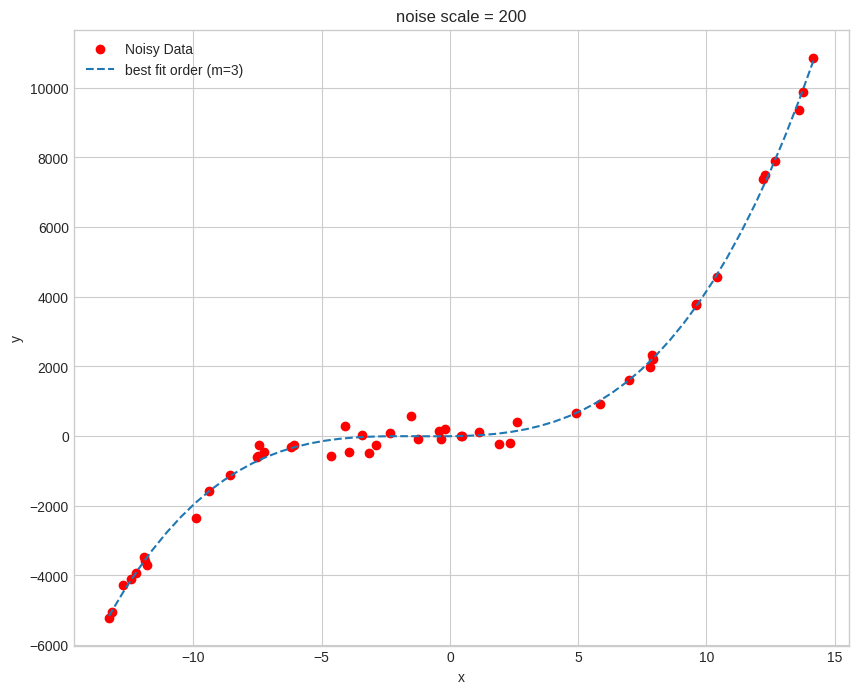

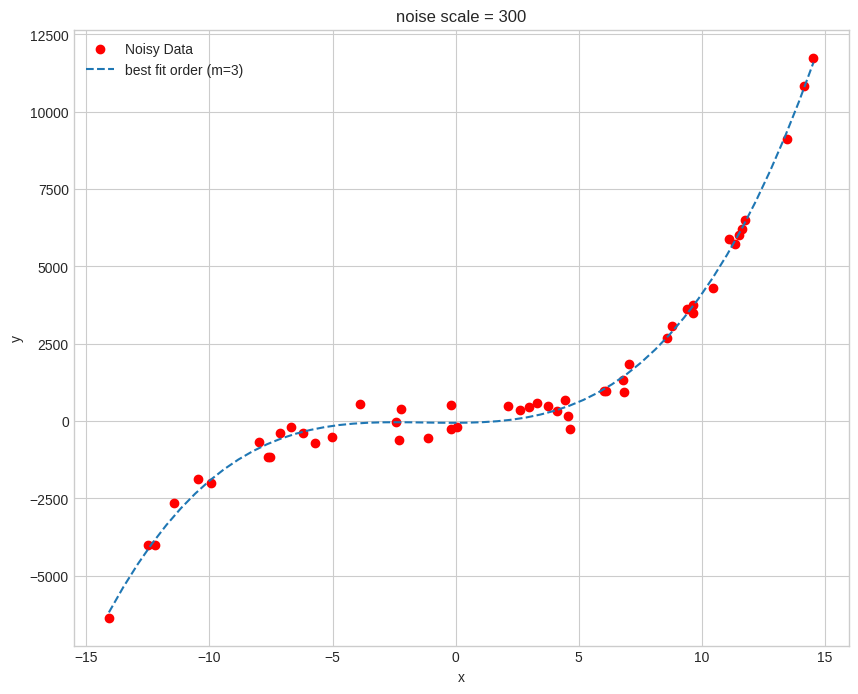

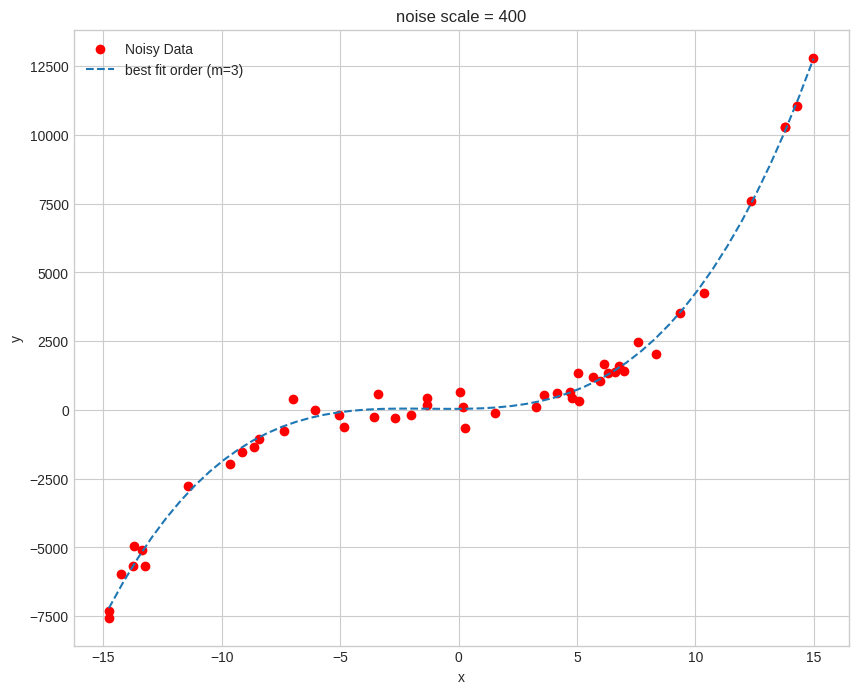

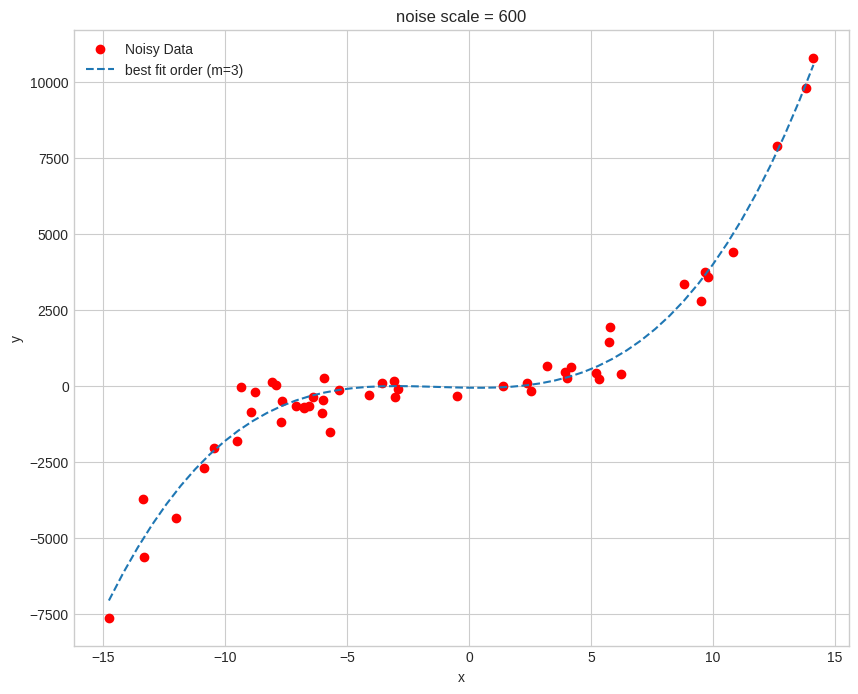

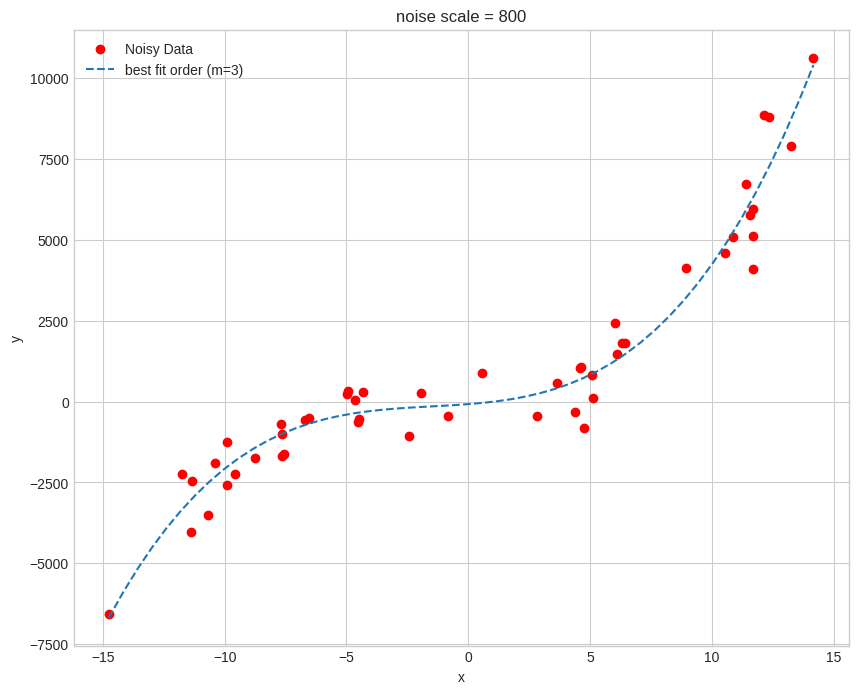

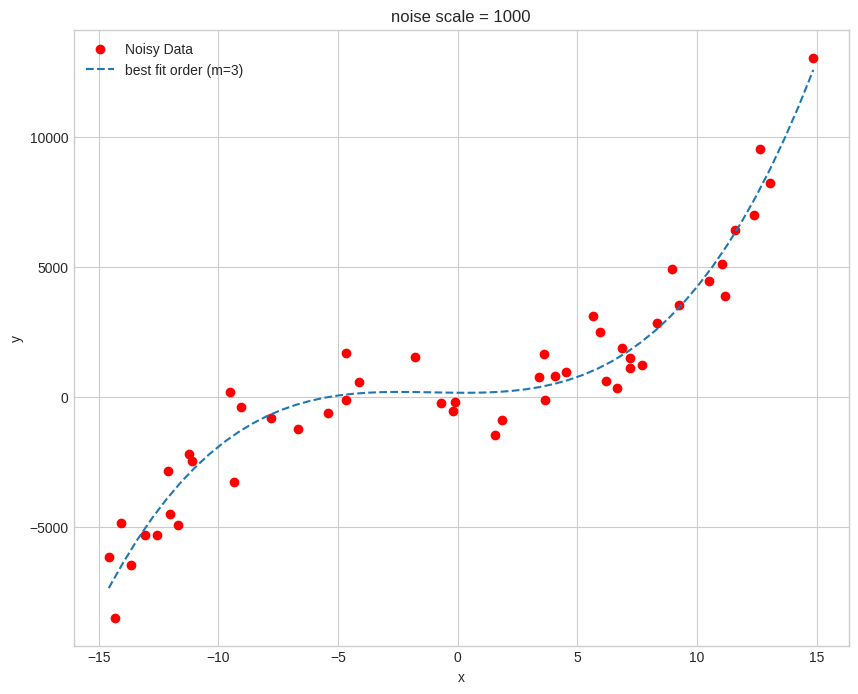

In [34]:
noise_scales = [200, 300, 400, 600, 800, 1000]

# The best m found in 2) is m=3 bcoz the the datapoints are fitted after order 3
m = 3

# Loop through each noise_scale value
for noise_scale in noise_scales:

    number_of_samples = 50
    x = 30 * (np.random.rand(number_of_samples, 1) - 0.5)
    y = 2 * x + 11 * x**2 + 3 * x**3 + noise_scale * np.random.randn(number_of_samples, 1)
    coefficients = np.polyfit(x.flatten(), y.flatten(), m)
    poly = np.poly1d(coefficients)

    y_pred = poly(x)

    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, c='r', label='Noisy Data', marker='o')
    plt.xlabel('x')
    plt.ylabel('y')

    # Plot the fitted polynomial curve
    x_curve = np.linspace(min(x), max(x), 50)
    y_curve = poly(x_curve)
    plt.plot(x_curve, y_curve, label=f'best fit order (m={m})', linestyle='--')

    plt.legend()
    plt.title(f'noise scale = {noise_scale}')
    plt.grid(True)

    plt.show()

    #when the noise increases the tangents of the best fit curve are deviating more away from 0

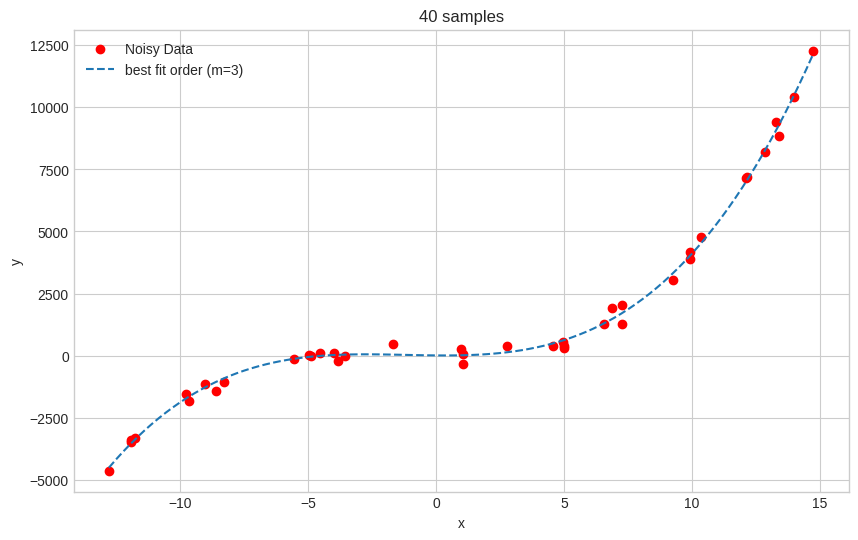

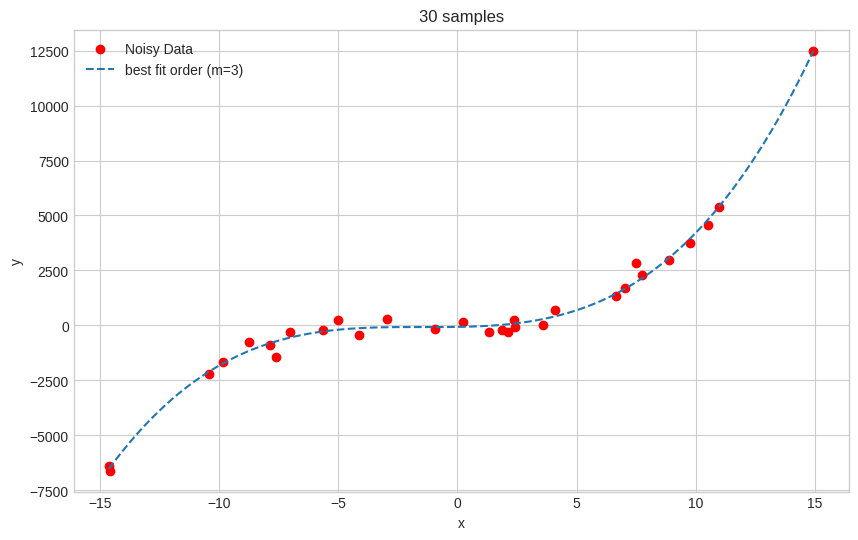

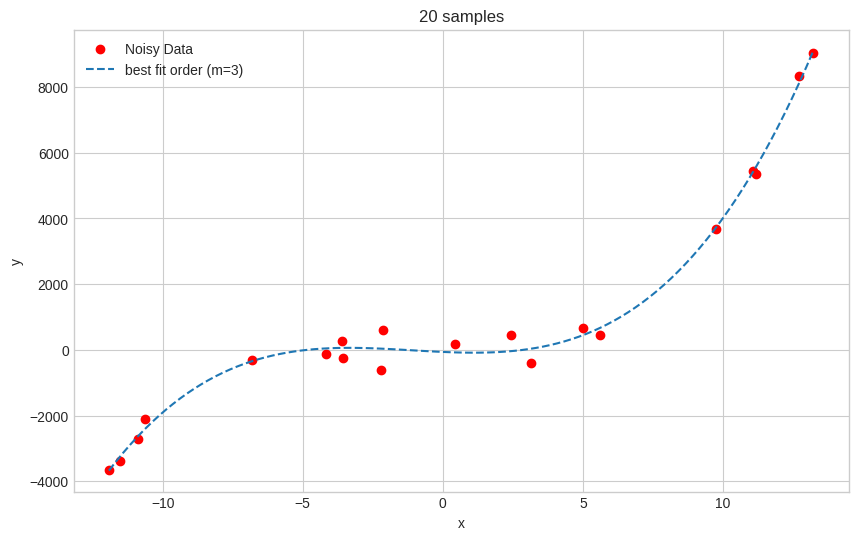

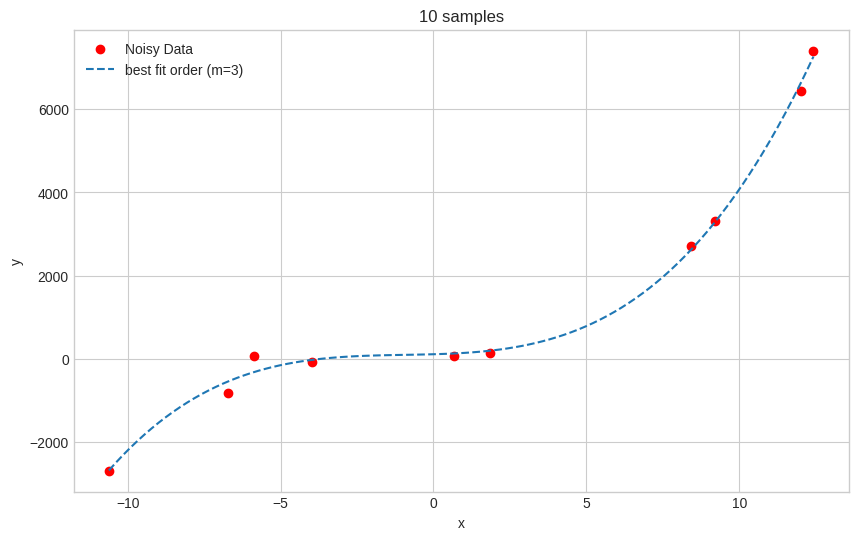

In [36]:
# Define a list of number_of_samples values
sample_counts = [40, 30, 20, 10]

# Loop through each number_of_samples value
for number_of_samples in sample_counts:

    noise_scale =300  #constant noise scale
    x = 30 * (np.random.rand(number_of_samples, 1) - 0.5)
    y = 2 * x + 11 * x**2 + 3 * x**3 + noise_scale * np.random.randn(number_of_samples, 1)

    coefficients = np.polyfit(x.flatten(), y.flatten(), m)
    poly = np.poly1d(coefficients)

    y_pred = poly(x)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, c='r', label='Noisy Data', marker='o')
    plt.xlabel('x')
    plt.ylabel('y')

    # Plot the fitted polynomial curve
    x_curve = np.linspace(min(x), max(x), 100)
    y_curve = poly(x_curve)
    plt.plot(x_curve, y_curve, label=f'best fit order (m={m})', linestyle='--')

    plt.legend()
    plt.title(f'{number_of_samples} samples')
    plt.grid(True)

    plt.show()

    #when the number of samples reduce the best fit polynomial curve deviates away from the origin